**Contents:**

1. Translation transformation
2. Mirror transformation
3. Rotation transformation 
4. Scaling transformation
5. Shear transformation
6. Affine transformation


In [3]:
from skimage import data, io
import cv2
import numpy as np
import matplotlib.pyplot as plt

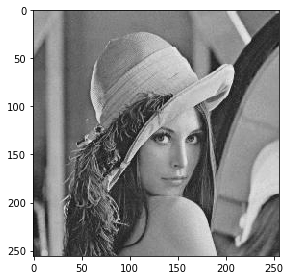

In [4]:
# im = data.astronaut()
# io.imshow(im)
im = cv2.imread('lena.png',0) 
# im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
io.imshow(im)

In [8]:
cv2.warpAffine??

Docstring:
warpAffine(src, M, dsize[, dst[, flags[, borderMode[, borderValue]]]]) -> dst
.   @brief Applies an affine transformation to an image.
.   
.   The function warpAffine transforms the source image using the specified matrix:
.   
.   \f[\texttt{dst} (x,y) =  \texttt{src} ( \texttt{M} _{11} x +  \texttt{M} _{12} y +  \texttt{M} _{13}, \texttt{M} _{21} x +  \texttt{M} _{22} y +  \texttt{M} _{23})\f]
.   
.   when the flag #WARP_INVERSE_MAP is set. Otherwise, the transformation is first inverted
.   with #invertAffineTransform and then put in the formula above instead of M. The function cannot
.   operate in-place.
.   
.   @param src input image.
.   @param dst output image that has the size dsize and the same type as src .
.   @param M \f$2\times 3\f$ transformation matrix.
.   @param dsize size of the output image.
.   @param flags combination of interpolation methods (see #InterpolationFlags) and the optional
.   flag #WARP_INVERSE_MAP that means that M is the inverse transf

# translation transformation
 M=$
 \left|\begin{matrix}
    1 & 0 & dx \\
    0 & 1 & dy \\
    0 & 0 & 1
   \end{matrix} \right|
 $
 
<font color ='red'> **NOTE: the size of transformation matrix in OPENCV is (2,3)
 M  =$\left|\begin{matrix}
    1 & 0 & dx \\
    0 & 1 & dy 
   \end{matrix} \right|
 $** </font>

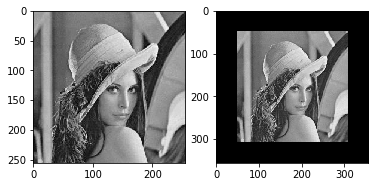

In [7]:
h,w = im.shape

# transformation matrix (2,3)
M = np.float32([[1,0, 50],[0,1,50]])

# size of the output image(w,h)
d= cv2.warpAffine(im, M, (w+100,h+100))

plt.subplot(121)
plt.imshow(im, cmap='gray')
plt.subplot(122)
plt.imshow(d, cmap='gray')

# Mirror transformation

## horizontal mirror transfrormation
 M=$
 \left|\begin{matrix}
    1 & 0 & 0 \\
    0 & -1 & dy \\
    0 & 0 & 1
   \end{matrix} \right|
 $

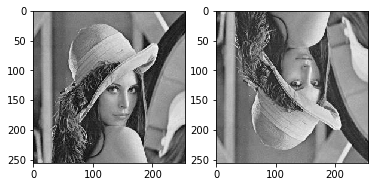

In [8]:
M = np.float32([[1,0, 0],[0,-1,h]])
# size of the output image(w,h)
d= cv2.warpAffine(im, M, (w,h))

plt.subplot(121)
plt.imshow(im, cmap='gray')
plt.subplot(122)
plt.imshow(d, cmap='gray')

## vertical mirror transfrormation
 M=$
 \left|\begin{matrix}
    -1 & 0 & dx \\
    0 & 0 & 0 \\
    0 & 0 & 1
   \end{matrix} \right|
 $

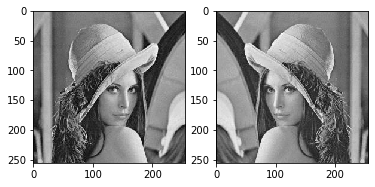

In [21]:
M = np.float32([[-1,0, w],[0,1,0]])
# size of the output image(w,h)
d= cv2.warpAffine(im, M, (w,h))

plt.subplot(121)
plt.imshow(im, cmap='gray')
plt.subplot(122)
plt.imshow(d, cmap='gray')

# transpose transformation
 $
 \left[\begin{matrix}
    1 & 0 & 0 \\
    0 & 1 & 0 \\
    0 & 0 & 1
   \end{matrix} \right]
 $ --->
 $
 \left[\begin{matrix}
    0 & 1 & 0 \\
    1 & 0 & 0 \\
    0 & 0 & 1
   \end{matrix} \right]
 $

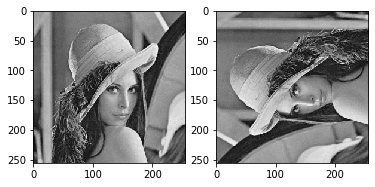

In [23]:
M = np.float32([[0,1, 0],[1,0,0]])
# size of the output image(w,h)
d= cv2.warpAffine(im, M, (w,h))

plt.subplot(121)
plt.imshow(im, cmap='gray')
plt.subplot(122)
plt.imshow(d, cmap='gray')

# Rotation transformation
The transformation matrix:
 M=$
 \left|\begin{matrix}
   cos(\theta) & sin(\theta) & dx \\
    -sin(\theta) & cos(\theta) & 0 \\
    0 & 0 & 1
   \end{matrix} \right|
 $

In opencv, the matrix M can be written as :
M=
$
 \left|\begin{matrix}
  \alpha & \beta & (1-\alpha) \cdot center.x-\beta \cdot center.y \\
    -\beta & \alpha & \beta \cdot center.x+(1-alpha) \cdot center.y \\
    %0 & 0 & 1
   \end{matrix} \right|
 $
 
where $\alpha =scale \cdot cos(\theta)$ and $\beta= scale \cdot sin(\theta)$ are the scaling factor. 

<!-- The center is usually defined as the image center.  -->
**OPENCV uses cv2.getRotationMatrix2D to obtain the transformation matrix.**

In [24]:
cv2.getRotationMatrix2D??


Docstring:
getRotationMatrix2D(center, angle, scale) -> retval
.   @brief Calculates an affine matrix of 2D rotation.
.   
.   The function calculates the following matrix:
.   
.   \f[\begin{bmatrix} \alpha &  \beta & (1- \alpha )  \cdot \texttt{center.x} -  \beta \cdot \texttt{center.y} \\ - \beta &  \alpha &  \beta \cdot \texttt{center.x} + (1- \alpha )  \cdot \texttt{center.y} \end{bmatrix}\f]
.   
.   where
.   
.   \f[\begin{array}{l} \alpha =  \texttt{scale} \cdot \cos \texttt{angle} , \\ \beta =  \texttt{scale} \cdot \sin \texttt{angle} \end{array}\f]
.   
.   The transformation maps the rotation center to itself. If this is not the target, adjust the shift.
.   
.   @param center Center of the rotation in the source image.
.   @param angle Rotation angle in degrees. Positive values mean counter-clockwise rotation (the
.   coordinate origin is assumed to be the top-left corner).
.   @param scale Isotropic scale factor.
.   
.   @sa  getAffineTransform, warpAffine, transform
Typ

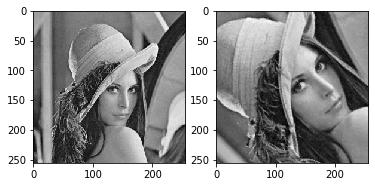

In [16]:
# image center
cnt = (h/2, w/2)
# rotation angle
angle = 45

# define the rotation transoformation matrix
M = cv2.getRotationMatrix2D(cnt, angle, 0.8)
d= cv2.warpAffine(im, M, (w,h))

plt.subplot(121)
plt.imshow(im, cmap='gray')
plt.subplot(122)
plt.imshow(d, cmap='gray')

## Scaling transformation

M= $
 \left|\begin{matrix}
    S_x & 0 & 0 \\
    0 & S_y & 0 \\
    0 & 0 & 1
   \end{matrix} \right|
 $

## cv.resize()
enlarge the image: cv2.INTER_CUBIC
reduce the image: cv2.INTER_AREA

In [31]:
cv2.resize??

Docstring:
resize(src, dsize[, dst[, fx[, fy[, interpolation]]]]) -> dst
.   @brief Resizes an image.
.   
.   The function resize resizes the image src down to or up to the specified size. Note that the
.   initial dst type or size are not taken into account. Instead, the size and type are derived from
.   the `src`,`dsize`,`fx`, and `fy`. If you want to resize src so that it fits the pre-created dst,
.   you may call the function as follows:
.   @code
.       // explicitly specify dsize=dst.size(); fx and fy will be computed from that.
.       resize(src, dst, dst.size(), 0, 0, interpolation);
.   @endcode
.   If you want to decimate the image by factor of 2 in each direction, you can call the function this
.   way:
.   @code
.       // specify fx and fy and let the function compute the destination image size.
.       resize(src, dst, Size(), 0.5, 0.5, interpolation);
.   @endcode
.   To shrink an image, it will generally look best with #INTER_AREA interpolation, whereas to
.   enlar

original image size:(256,256)
new image size:(100,200)


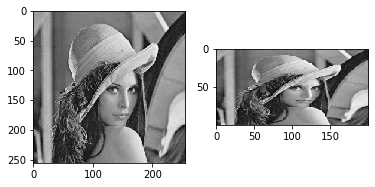

In [14]:
print('original image size:({},{})'.format(h,w))
ds = (200,100)
imn=cv2.resize(im, ds)
print('new image size:({},{})'.format(imn.shape[0],imn.shape[1]))

plt.subplot(121)
plt.imshow(im, cmap='gray')
plt.subplot(122)
plt.imshow(imn, cmap='gray')

## cv2.warpAffine()



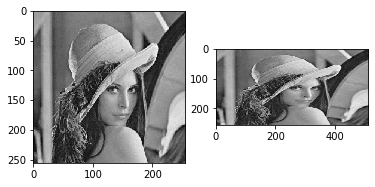

In [35]:
M = np.float32([[2,0, 0],[0,1,0]])
d= cv2.warpAffine(im, M, (2*w,h))

plt.subplot(121)
plt.imshow(im, cmap='gray')
plt.subplot(122)
plt.imshow(d, cmap='gray')

# Shear transformation
M= $
 \left|\begin{matrix}
    1 & h_x & 0 \\
    h_y & 1 & 0 \\
    0 & 0 & 1
   \end{matrix} \right|
 $
 
 

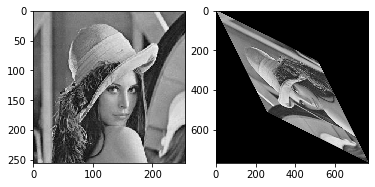

In [39]:
M = np.float32([[1,2, 0],[2,1,0]])
d= cv2.warpAffine(im, M, (3*w,3*h))

plt.subplot(121)
plt.imshow(im, cmap='gray')
plt.subplot(122)
plt.imshow(d, cmap='gray')

# Affine transformation

combination of 

finding the mapping from point1 to point2 using cv2.getAffineTransform()

In [45]:
cv2.circle??

Docstring:
circle(img, center, radius, color[, thickness[, lineType[, shift]]]) -> img
.   @brief Draws a circle.
.   
.   The function cv::circle draws a simple or filled circle with a given center and radius.
.   @param img Image where the circle is drawn.
.   @param center Center of the circle.
.   @param radius Radius of the circle.
.   @param color Circle color.
.   @param thickness Thickness of the circle outline, if positive. Negative values, like #FILLED,
.   mean that a filled circle is to be drawn.
.   @param lineType Type of the circle boundary. See #LineTypes
.   @param shift Number of fractional bits in the coordinates of the center and in the radius value.
Type:      builtin_function_or_method


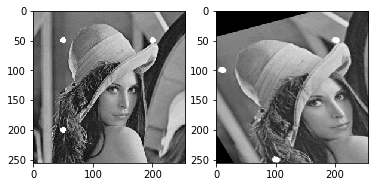

In [51]:
# first point on the original image
pts1=np.float32([[50,50],[200,50],[50,200]])

# the corresponding point in the object image
pts2=np.float32([[20,100],[200,50],[100,250]])

# get the transformation matrix
M = cv2.getAffineTransform(pts1, pts2)
d = cv2.warpAffine(im, M, (h,w))

plt.subplot(121)
plt.imshow(im, cmap='gray')
# draw the points
for p in range(3): 
#     (center, radius, color, thickness )
    cv2.circle(im, (pts1[p][0],pts1[p][1]), 1, (255,0,0),4)
    
plt.subplot(122)
plt.imshow(d, cmap='gray')

In [17]:
cv2.circle??

Docstring:
circle(img, center, radius, color[, thickness[, lineType[, shift]]]) -> img
.   @brief Draws a circle.
.   
.   The function cv::circle draws a simple or filled circle with a given center and radius.
.   @param img Image where the circle is drawn.
.   @param center Center of the circle.
.   @param radius Radius of the circle.
.   @param color Circle color.
.   @param thickness Thickness of the circle outline, if positive. Negative values, like #FILLED,
.   mean that a filled circle is to be drawn.
.   @param lineType Type of the circle boundary. See #LineTypes
.   @param shift Number of fractional bits in the coordinates of the center and in the radius value.
Type:      builtin_function_or_method
